In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

In [2]:
df = pd.read_csv("/Users/meetsudra/Documents/GitHub/timeseries/datasets/CO2 Concentration.csv")
df.head()

,Year,Month,CO2 Concentration
0,1975,1,330.62
1,1975,2,331.40
2,1975,3,331.87
3,1975,4,333.18
4,1975,5,333.92


In [3]:
df['Date'] = df['Year'].astype(str)+'-'+df['Month'].astype(str)
df['Date'] = pd.to_datetime(df['Date'])
df.drop(columns=['Month','Year'],inplace=True)

In [4]:
df.head()

,CO2 Concentration,Date
0,330.62,1975-01-01
1,331.40,1975-02-01
2,331.87,1975-03-01
3,333.18,1975-04-01
4,333.92,1975-05-01


In [5]:
df = df.set_index('Date')

In [6]:
df.head()

,CO2 Concentration
Date,
1975-01-01,330.62
1975-02-01,331.40
1975-03-01,331.87
1975-04-01,333.18
1975-05-01,333.92


<Axes: xlabel='Date', ylabel='CO2 Concentration'>

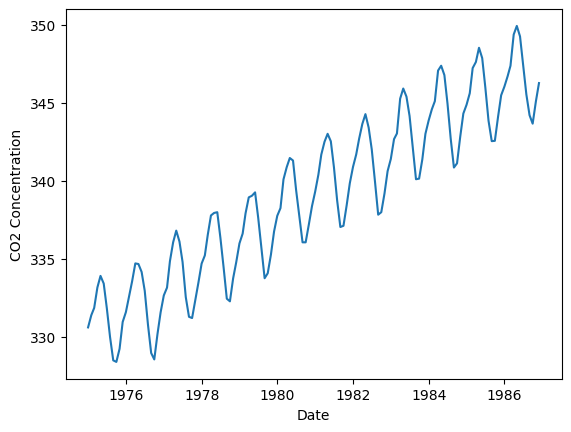

In [7]:
sns.lineplot(df['CO2 Concentration'])

We see a increasing trend which seems constant with a constant seasonality 

In [ ]:
# Lets check it using PymannKendall test 
import pymannkendall as mk 

mk.original_test(df['CO2 Concentration'])

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=13.22737013469656, Tau=0.7438811188811189, s=7659.0, var_s=335184.3333333333, slope=0.11999999999999982, intercept=330.545)

Yes there is a increasing trend!

Now, Statistically how can u determine whether the time series data is stationary?

There are two tests!
1. ADF 
2. KPSS

(Difference between two test is in their hypothesis)

### ADF test 

Null Hypothesis (H0) : Series is non stationary, or series has a unit root 

Alternate Hypothesis (Ha) : Series is stationary, or series has no unit root 

if p-value < 0.05 then reject H0

In [8]:
from statsmodels.tsa.stattools import adfuller 

adftest = adfuller(df['CO2 Concentration'])
print(adftest)


(-0.612294140001057, 0.8681797862771405, 14, 129, {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}, 100.38999626540178)


Here the second value is the p-value which is greater the 0.05 and hence we fail to reject Null Hypothesis # That is series is non stationary

### KPSS test 
Null Hypothesis (H0) : The series is Stationary or has no unit root 

Alternate Hypothesis (Ha) : The series is Non-Stationary or has unit root 

If p-value<0.5 then reject Null Hypothesis

In [9]:
from statsmodels.tsa.stattools import kpss

result = kpss(df['CO2 Concentration'])
result[1] # p-value in the tuple

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1495/1881287843.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df['CO2 Concentration'])


0.01

Here the p-value is less then 0.5 thus we reject the null hypothesis. Thus Series is Non-stationary 

### ACF olot

<Figure size 2000x500 with 0 Axes>

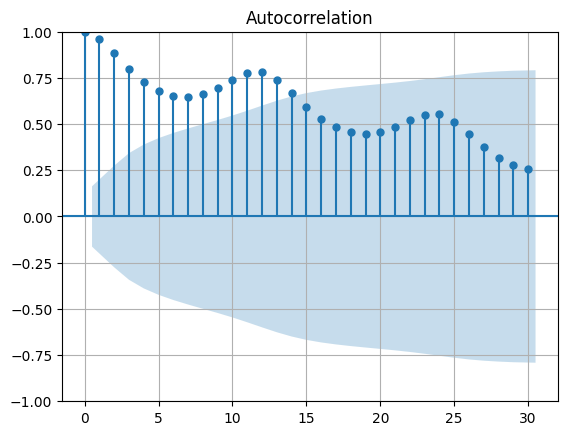

In [10]:
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(20,5))
plot_acf(df['CO2 Concentration'], lags=30)

plt.grid()
plt.show()


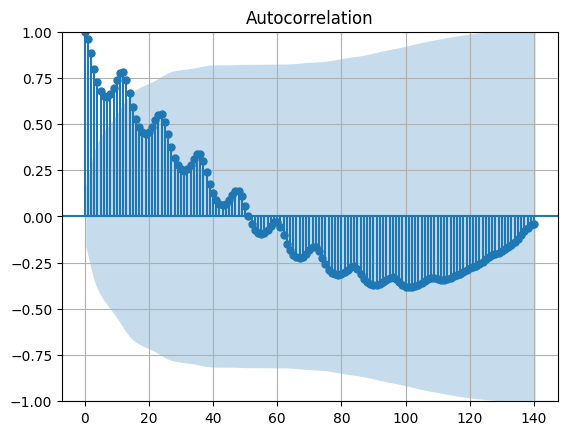

In [13]:
plot_acf(df["CO2 Concentration"],ax =plt.gca(), lags=140)
plt.grid()
plt.show()

What does Stationary mean?
1. constant mean and variance and constant autocorrelation 
2. if the lags quickly drop near to zero after some lags then we can say that on current lag values, there are only few past values influencing it (near ones)
3. White noise (completely random series) has zero autocorrelation after lag 0.
4. if the lags show sinosioidal wave like structure it means there is seasonal effect in the series. same behaviour after some time.

### PACF Plot
PACF removes the influence of intermediate lags 

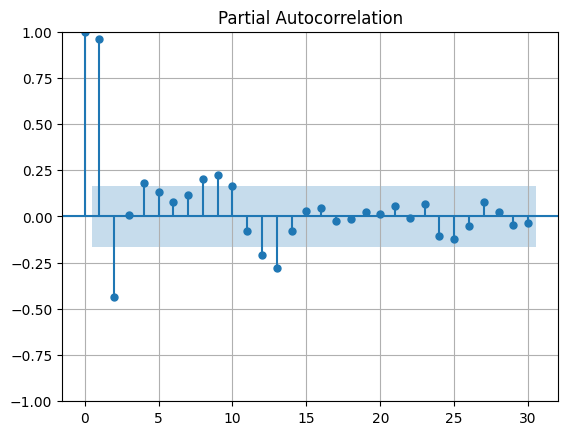

In [14]:
plot_pacf(df['CO2 Concentration'], lags=30)
plt.grid()
plt.show()

In pacf plot, we can see that lags are not int the significant region, which was similar to acf plot 
Thus we can say that the series is non-stationary 

# So to make the series stationary we do differencing 

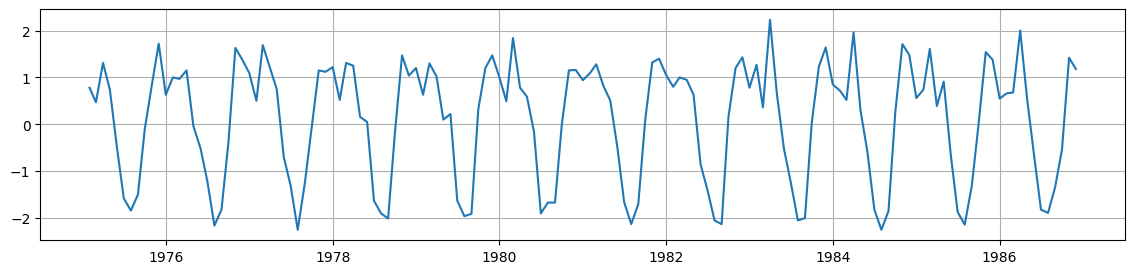

In [ ]:
# First Order Non-Seasonal Differencing 

diff = df["CO2 Concentration"].diff().dropna()   # Trying to make data trend stationary 
plt.figure(figsize=(14,3))
plt.grid()
plt.plot(diff)
plt.show()


#### Lets check using adf, kpss and acf, pacf plots to check whether the series is stationary or not 

In [19]:
# adftest
diff_adf = adfuller(diff)
diff_adf[1] # pvalue

0.08281493430333509

since the value is greater then 0.05 we cannot reject ho means the series is NOT stationary 

In [20]:
# kpsstest 
diff_kpss = kpss(diff)
diff_kpss[1]

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1495/1444237685.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  diff_kpss = kpss(diff)


0.1

the p value is greater then 0.05 this means we cannot reject null hypothesis and say that series is trend stationary

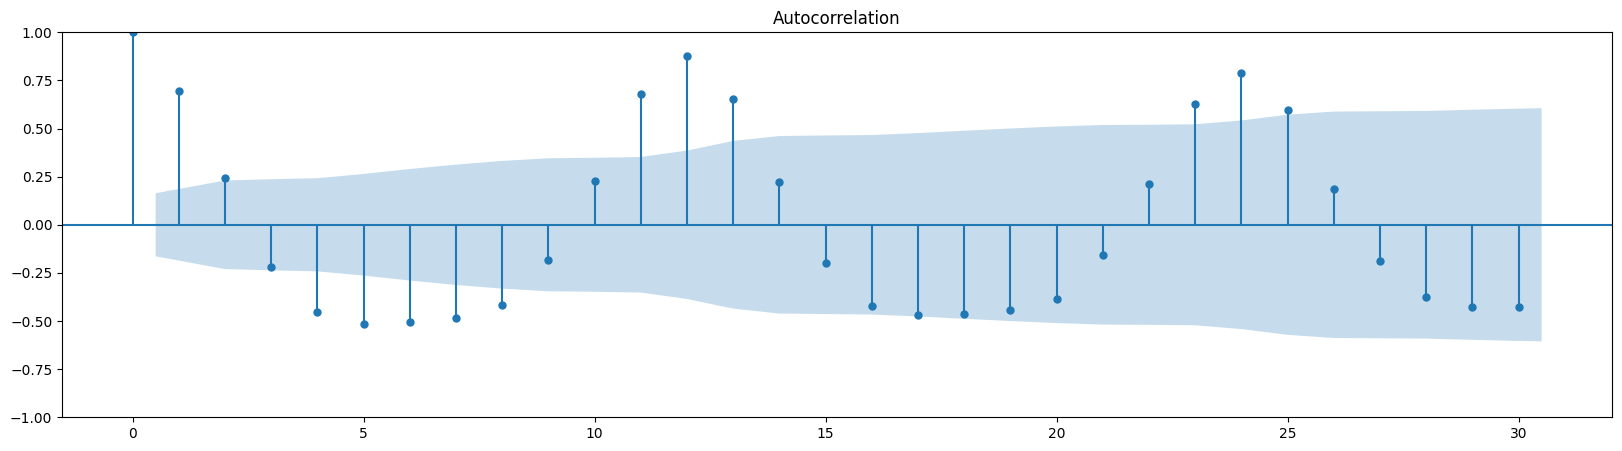

In [22]:
plt.figure(figsize=(20,5))
plot_acf(diff, ax=plt.gca(), lags=30)
plt.show()

Sine wave pattern, autocorrelation values are significant so non stationary - Thus still not stationary 

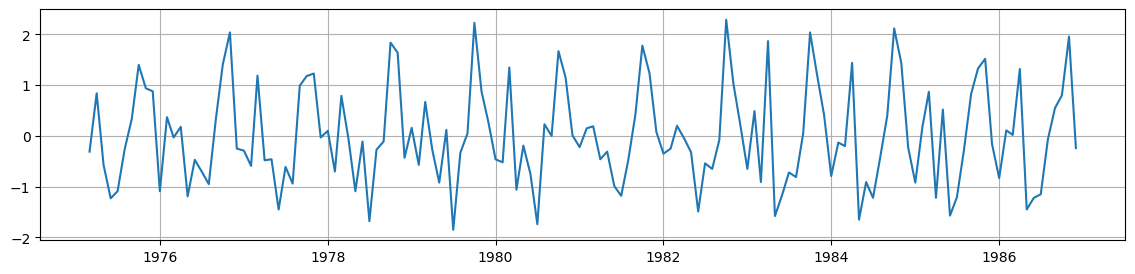

In [23]:
# Second Order Non-Seasonal Differencing
diff2 = df["CO2 Concentration"].diff().diff().dropna() # trying to make data trend stationary
plt.figure(figsize=(14,3))
plt.grid()
plt.plot(diff2)
plt.show()

In [25]:
# adf test 
diff2_adf = adfuller(diff2)
diff2_adf[1]

2.570047802195123e-18

p-value is less then 0.05 means we reject null hypothesis means series is stationary now 

In [26]:
# kpss test
diff2_kpss = kpss(diff2)
diff2_kpss[1]

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1495/1754314814.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  diff2_kpss = kpss(diff2)


0.1

p-value is greater then 0.05 means we cannot reject null hypthesis means series is trend stationary

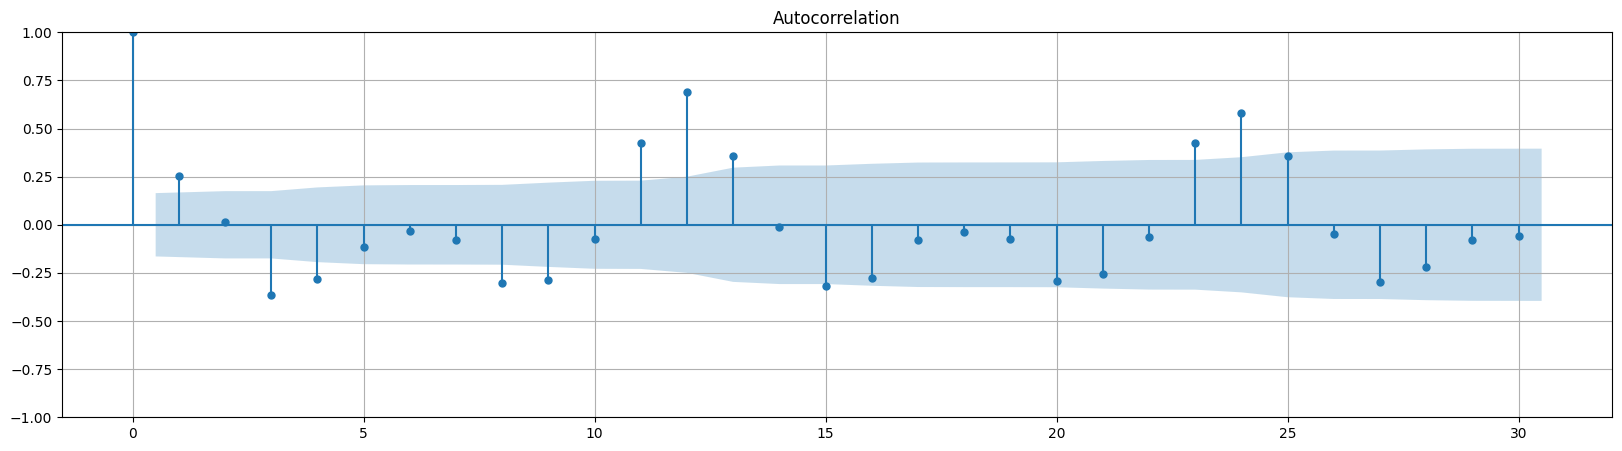

In [33]:
# ACF plot 

plt.figure(figsize=(20,5))
plt.grid()
plot_acf(diff2, ax=plt.gca(),lags=30)
plt.show()


We could infer from tests that series is stationary but acf plot states that series is not stationary, it still has some seasonality

There is no meaning of doing 3 order differencing because we will be deviating from the original data (it would be bias)

# First order Seasonal differencing 

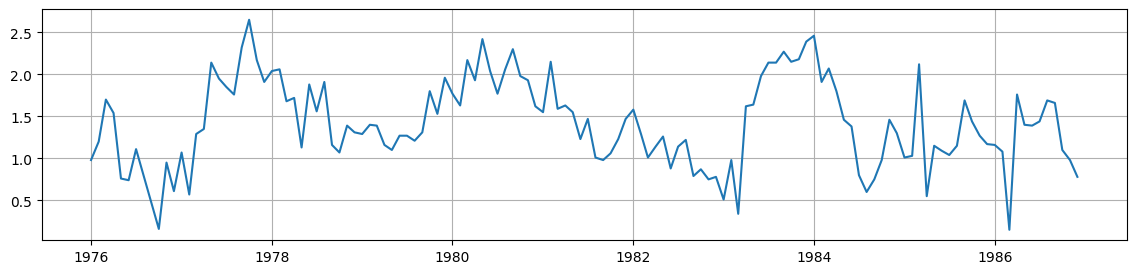

In [35]:
# First Order Seasoanl Differencing
sdiff = df["CO2 Concentration"].diff(periods=12).dropna()  # trying to remove seasonality 
plt.figure(figsize=(14,3))
plt.grid()
plt.plot(sdiff)
plt.show()

In [36]:
# adf test of first order seasoanl differencing
sdiff_adf = adfuller(sdiff)
sdiff_adf[1]

0.013602312931461588

p-value is less then 0.05 means we reject null hypothesis and state that series is stationary

In [37]:
# kpss test for first order seasonal differencing 
sdiff_kpss = kpss(sdiff)
sdiff_kpss[1]

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1495/4237449354.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  sdiff_kpss = kpss(sdiff)


0.1

p-value is greater then 0.05 means we fail to reject null hypothesis and state that series is stationary

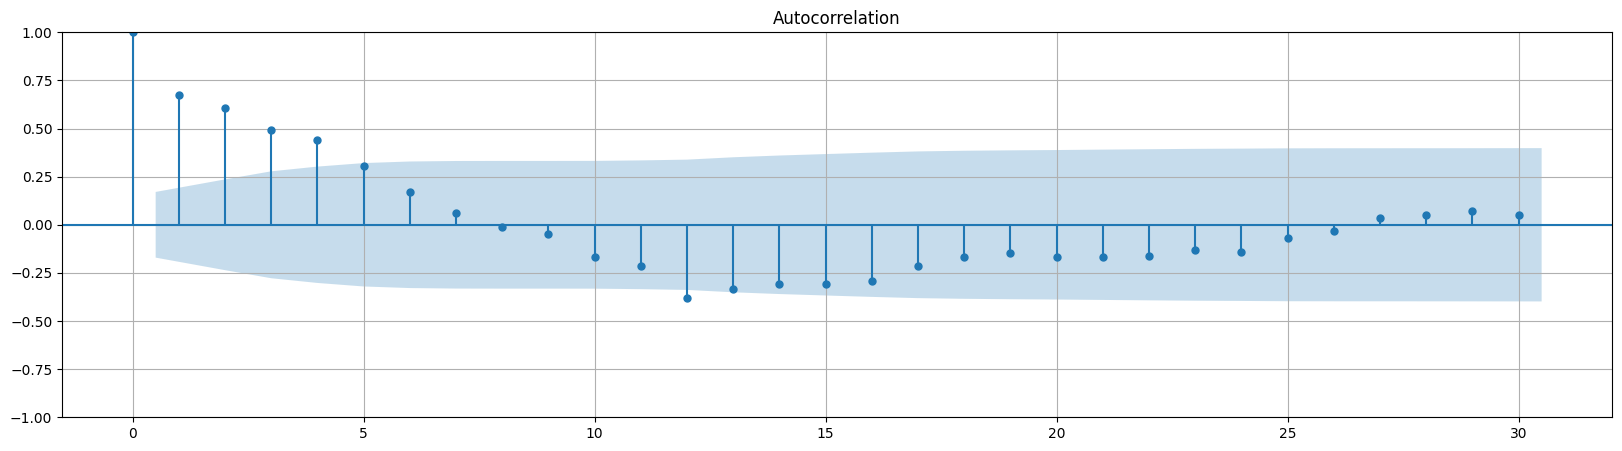

In [39]:
# acf of First Order Seasonal Differencing 
plt.figure(figsize=(20,5))
plt.grid()
plot_acf(sdiff, ax=plt.gca(), lags=30)
plt.show()

Series is stationary but the graph here is not proper


Performing non-seasonal differencing did not work 

Nor seasonal differencing worked

Thus will combine both 

# Seasonal and Non-Seasonal Differencing 

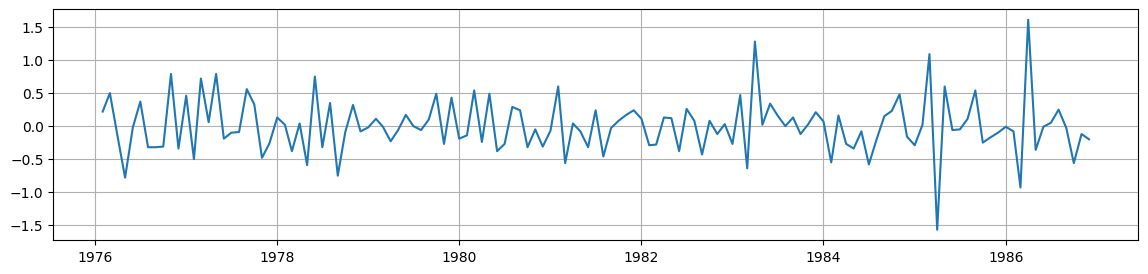

In [41]:
sdiff = df["CO2 Concentration"].diff(periods=12).dropna() # seasonal differencing 
nsdiff = sdiff.diff().dropna() # non-seasonal differencing 1st order karsu 

plt.figure(figsize=(14,3))
plt.grid()
plt.plot(nsdiff)

plt.show()

In [42]:
# ADF of First order combined differencing 

nsdiff_adf = adfuller(nsdiff)
nsdiff_adf[1]

4.395427959069336e-05

p-value is less then 0.05 means we reject null hypo and state that the series is stationary

In [43]:
# kpss of First order combined differencing

nsdiff_kpss = kpss(nsdiff)
nsdiff_kpss[1] 

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1495/3203441521.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  nsdiff_kpss = kpss(nsdiff)


0.1

p-value is less then 0.05 means we fail to reject null hypothesis that states that serie is stationary

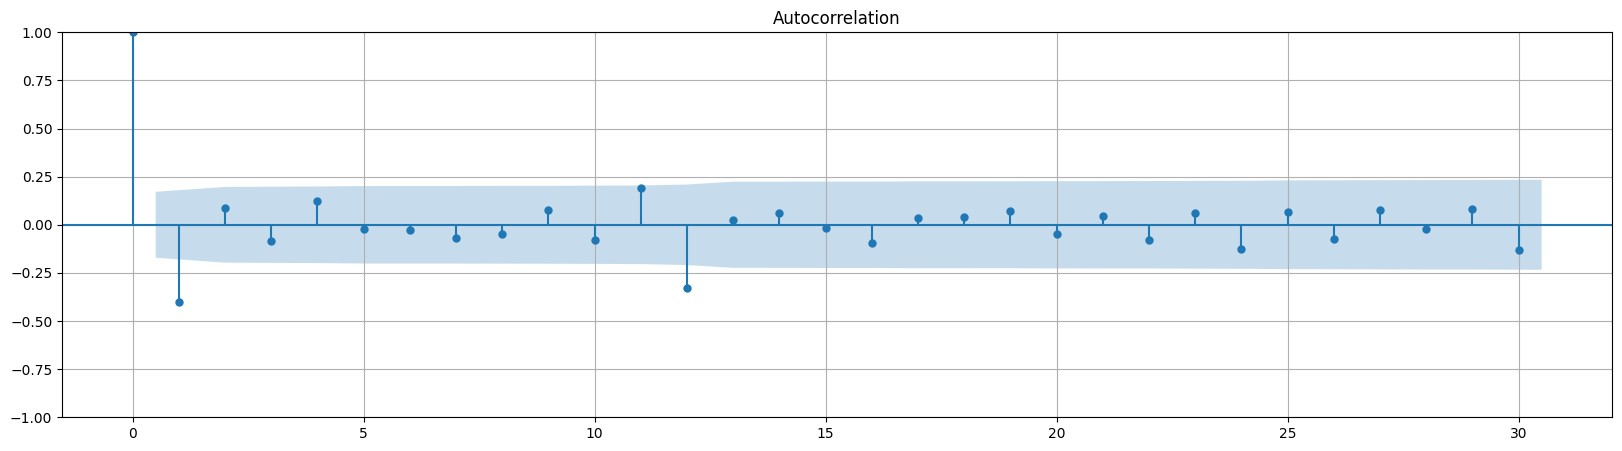

In [44]:
# acf plot 
plt.figure(figsize=(20,5))
plt.grid()
plot_acf(nsdiff, ax=plt.gca(), lags=30)
plt.show()

# Now since majority of lags are in the significant region along and there is no correlation as well.
# Thus we can state that series has become stationary after adf, kpss and acf on combined differencing of CO2 Concentration